In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

In [52]:
def print_latex(symbol):
    print(sp.latex(symbol))

symp = sp.sympify

In [53]:
# Create Geometry Symbols
m, Length = sp.symbols('m L')


# Create Symbols for Prescribed Arm Motion
theta_0 = sp.symbols(r'\theta_0')
omega = sp.symbols(r'\omega')
t = sp.symbols('t', real = True)
theta_z = theta_0 * (1 - sp.cos(omega * t))
theta_y = theta_0 * sp.sin(omega * t)


In [76]:
# Vectors of Unknowns
q1 = sp.Function('q_1')(t)
q2 = sp.Function('q_2')(t)
q3 = sp.Function('q_3')(t)
q4 = sp.Function('q_4')(t)
q5 = sp.Function('q_5')(t)
q6 = sp.Function('q_6')(t)
q1_dot = sp.diff(q1)
q2_dot = sp.diff(q2)
q3_dot = sp.diff(q3)
q4_dot = sp.diff(q4)
q5_dot = sp.diff(q5)
q6_dot = sp.diff(q6)
q1_ddot = sp.diff(q1_dot)
q2_ddot = sp.diff(q2_dot)
q3_ddot = sp.diff(q3_dot)
q4_ddot = sp.diff(q4_dot)
q5_ddot = sp.diff(q5_dot)
q6_ddot = sp.diff(q6_dot)


r_b_vec = sp.Matrix([q1, q2, q3]).reshape(3,1)
r_b_dot_vec = sp.Matrix([q1_dot, q2_dot, q3_dot]).reshape(3,1)
omega_b_vec = sp.Matrix([q4_dot, q5_dot, q6_dot]).reshape(3,1)

# Create Relative Displacement Vectors
r_ba_vec = sp.Matrix([-Length/2, Length/10, 0]).reshape(3,1)
r_bc_vec = sp.Matrix([Length/2, -Length/10, 0]).reshape(3,1)
r_ag_vec = sp.Matrix([-Length/2 * sp.sin(theta_z), Length/2 * sp.cos(theta_z), 0]).reshape(3,1)
r_cm_vec = sp.Matrix([Length/2 * sp.cos(theta_y), 0, Length/2 * sp.sin(theta_y)]).reshape(3,1)

# Create the Angular Velocity Vectors for the Arms
omega_g_vec = sp.Matrix([0,0, sp.diff(theta_z,t)]).reshape(3,1)
omega_m_vec = sp.Matrix([0, sp.diff(theta_y, t), 0]).reshape(3,1)
omega_g_vec_b_frame = omega_b_vec + omega_g_vec
omega_m_vec_b_frame = omega_b_vec + omega_m_vec

r_g_dot_vec = r_b_dot_vec + omega_b_vec.cross(r_ba_vec) + omega_g_vec.cross(r_ag_vec)
r_m_dot_vec = r_b_dot_vec + omega_b_vec.cross(r_bc_vec) + omega_m_vec.cross(r_cm_vec)


In [90]:
# Moments of Inertia
I_b_vec_vec = sp.Matrix([[symp(1)/12 * ((Length/ 5)**2) + (Length/5)**2, 0,0],
                         [0, symp(1)/12 * (Length**2 + (Length/5)**2), 0],
                         [0, 0, symp(1)/12 * (Length**2 + (Length/5)**2)]])

I_g_vec_vec = sp.Matrix([[m/4 * Length / 12, 0, 0],
                         [0, 0, 0],
                         [0, 0, m/4 * Length / 12]])

I_m_vec_vec = sp.Matrix([[0,0,0],
                         [0,m/4 * Length / 12,0],
                         [0,0,m/4 * Length / 12]])

In [102]:
print_latex(I_m_vec_vec)

\left[\begin{matrix}0 & 0 & 0\\0 & \frac{L m}{48} & 0\\0 & 0 & \frac{L m}{48}\end{matrix}\right]


In [92]:
T = (1/2 * m * r_b_dot_vec.dot(r_b_dot_vec) + (omega_b_vec.T * I_b_vec_vec * omega_b_vec)[0] / 2
     + 1/2 * m/4 * r_g_dot_vec.dot(r_g_dot_vec) + (omega_g_vec_b_frame.T * I_g_vec_vec * omega_g_vec_b_frame)[0] / 2
     + 1/2 * m/4 * r_m_dot_vec.dot(r_m_dot_vec) + (omega_m_vec_b_frame.T * I_m_vec_vec * omega_m_vec_b_frame)[0] /2
    )
L=T

In [104]:
print_latex(T.simplify())

\frac{13 L^{2} \left(\frac{d}{d t} q_{4}{\left(t \right)}\right)^{2}}{600} + \frac{13 L^{2} \left(\frac{d}{d t} q_{5}{\left(t \right)}\right)^{2}}{300} + \frac{13 L^{2} \left(\frac{d}{d t} q_{6}{\left(t \right)}\right)^{2}}{300} + \frac{L m \left(\omega \theta_{0} \sin{\left(\omega t \right)} + \frac{d}{d t} q_{6}{\left(t \right)}\right)^{2}}{96} + \frac{L m \left(\omega \theta_{0} \cos{\left(\omega t \right)} + \frac{d}{d t} q_{5}{\left(t \right)}\right)^{2}}{96} + \frac{L m \left(\frac{d}{d t} q_{4}{\left(t \right)}\right)^{2}}{96} + \frac{L m \left(\frac{d}{d t} q_{6}{\left(t \right)}\right)^{2}}{96} + 0.00125 m \left(25 \left(L \frac{d}{d t} q_{6}{\left(t \right)} + 2 \frac{d}{d t} q_{2}{\left(t \right)}\right)^{2} + \left(5 L \omega \theta_{0} \sin{\left(\theta_{0} \sin{\left(\omega t \right)} \right)} \cos{\left(\omega t \right)} + L \frac{d}{d t} q_{6}{\left(t \right)} + 10 \frac{d}{d t} q_{1}{\left(t \right)}\right)^{2} + \left(5 L \omega \theta_{0} \cos{\left(\omega t \right)}

In [93]:
LE1 = sp.diff(L, q1) - sp.diff(sp.diff(L,q1_dot), t).simplify()
LE2 = sp.diff(L, q2) - sp.diff(sp.diff(L,q2_dot), t).simplify()
LE3 = sp.diff(L, q3) - sp.diff(sp.diff(L,q3_dot), t).simplify()
LE4 = sp.diff(L, q4) - sp.diff(sp.diff(L,q4_dot), t).simplify()
LE5 = sp.diff(L, q5) - sp.diff(sp.diff(L,q5_dot), t).simplify()
LE6 = sp.diff(L, q6) - sp.diff(sp.diff(L,q6_dot), t).simplify()


In [94]:
sols = sp.solve([LE1, LE2, LE3, LE4, LE5, LE6], 
                (q1_ddot, q2_ddot, q3_ddot, q4_ddot, q5_ddot, q6_ddot), 
                simplify=False, rational = False)

In [19]:
print_latex(sols[q1_ddot])

0.0833333333333333 L \omega^{2} \theta_{0}^{2} \sin^{2}{\left(\omega t \right)} \sin{\left(\theta_{0} \cos{\left(\omega t \right)} - \theta_{0} \right)} + 0.0833333333333333 L \omega^{2} \theta_{0} \cos{\left(\omega t \right)} \cos{\left(\theta_{0} \cos{\left(\omega t \right)} - \theta_{0} \right)}


In [95]:
dz1dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q1_ddot])
dz2dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q2_ddot])
dz3dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q3_ddot])
dz4dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q4_ddot])
dz5dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q5_ddot])
dz6dt_f = sp.lambdify((t,Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, q1_dot, q2_dot, q3_dot, q4_dot, q5_dot, q6_dot), sols[q6_ddot])
dq1dt_f = sp.lambdify(q1_dot, q1_dot)
dq2dt_f = sp.lambdify(q2_dot, q2_dot)
dq3dt_f = sp.lambdify(q3_dot, q3_dot)
dq4dt_f = sp.lambdify(q4_dot, q4_dot)
dq5dt_f = sp.lambdify(q5_dot, q5_dot)
dq6dt_f = sp.lambdify(q6_dot, q6_dot)

In [96]:
def dSdt(S, t, Length, m, theta_0, omega):
    q1, z1, q2, z2, q3, z3, q4, z4, q5, z5, q6, z6 = S
    return[
        dq1dt_f(z1),
        dz1dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
        dq2dt_f(z2),
        dz2dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
        dq3dt_f(z3),
        dz3dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
        dq4dt_f(z4),
        dz4dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
        dq5dt_f(z5),
        dz5dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
        dq6dt_f(z6),
        dz6dt_f(t, Length, m, theta_0, omega, q1, q2, q3, q4, q5, q6, z1, z2, z3, z4, z5, z6),
    ]

In [97]:
t_f = np.arange(0, 40, 1/64)
length_f = 1.0
mass_f = 1.0
theta_0_f = np.pi / 4
omega_f = 3.0

ans = odeint(dSdt, y0 = [0,0,0,0,0,0,0,0,0,0,0,0], t= t_f, args = (length_f, mass_f, theta_0_f, omega_f))


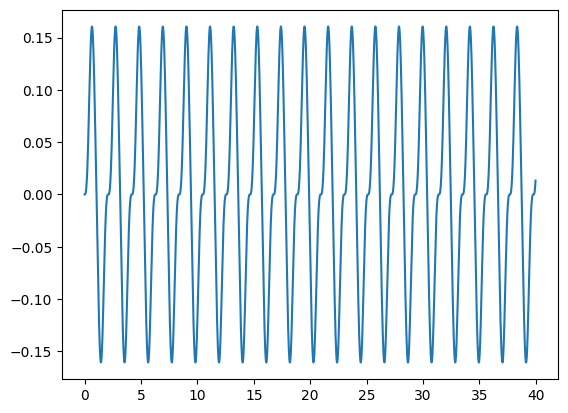

In [ ]:
r_b_x = ans.T[0]
r_b_y = ans.T[1]
r_b_z = ans.T[2]
omega_b_x = ans.T[3]
omega_b_y = ans.T[4]
omega_b_z = ans.T[5]
r_b_x_d = ans.T[6]
r_b_y_d = ans.T[7]
r_b_z_d = ans.T[8]
alpha_b_x = ans.T[9]
alpha_b_y = ans.T[10]
alpha_b_z = ans.T[11]



array([[<Axes: title={'center': 'X position'}>,
        <Axes: title={'center': 'Y position'}>,
        <Axes: title={'center': 'Z position'}>],
       [<Axes: title={'center': 'Euler Rotation X'}>,
        <Axes: title={'center': 'Euler Rotation Y'}>,
        <Axes: title={'center': 'Euler Rotation Z'}>]], dtype=object)

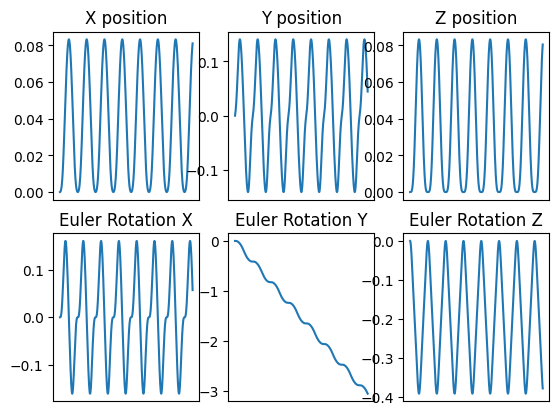

In [137]:
fig, ax = plt.subplots(2,3, frameon=True)
ax[0,0].plot(t_f[0:1000],r_b_x[0:1000])
ax[0,0].set_title('X position')
ax[0,1].plot(t_f[0:1000],r_b_y[0:1000])
ax[0,1].set_title('Y position')
ax[0,2].plot(t_f[0:1000],r_b_z[0:1000])
ax[0,2].set_title('Z position')
ax[1,0].plot(t_f[0:1000],omega_b_x[0:1000])
ax[1,0].set_title('Euler Rotation X')
ax[1,1].plot(t_f[0:1000],omega_b_y[0:1000])
ax[1,1].set_title('Euler Rotation Y')
ax[1,2].plot(t_f[0:1000],omega_b_z[0:1000])
ax[1,2].set_title('Euler Rotation Z')

plt.setp(ax, xticks=[])

ax

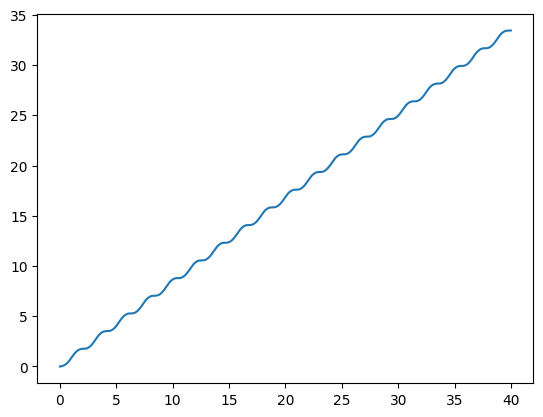

In [134]:
V = np.sqrt(r_b_x_d**2 + r_b_y_d**2 +  r_b_z_d**2)
plt.plot(t_f, V)

[]

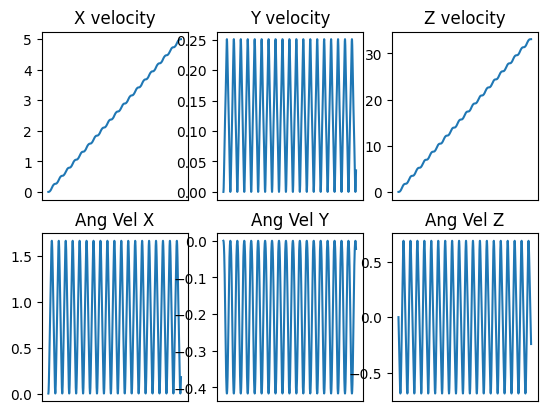

In [139]:
fig, ax = plt.subplots(2,3, frameon=True)
ax[0,0].plot(t_f,r_b_x_d)
ax[0,0].set_title('X velocity')
ax[0,1].plot(t_f,r_b_y_d)
ax[0,1].set_title('Y velocity')
ax[0,2].plot(t_f,r_b_z_d)
ax[0,2].set_title('Z velocity')
ax[1,0].plot(t_f,alpha_b_x)
ax[1,0].set_title('Ang Vel X')
ax[1,1].plot(t_f,alpha_b_y)
ax[1,1].set_title('Ang Vel Y')
ax[1,2].plot(t_f,alpha_b_z)
ax[1,2].set_title('Ang Vel Z')

plt.setp(ax, xticks=[])

In [99]:
np.save('r_b_x.npy', r_b_x)
np.save('r_b_y.npy', r_b_y)
np.save('r_b_z.npy', r_b_z)
np.save('omega_b_x.npy', omega_b_x)
np.save('omega_b_y.npy', omega_b_y)
np.save('omega_b_z.npy', omega_b_z)
np.save('r_b_x_d.npy', r_b_x_d)
np.save('r_b_y_d.npy', r_b_y_d)
np.save('r_b_z_d.npy', r_b_z_d)
np.save('alpha_b_x.npy', alpha_b_x)
np.save('alpha_b_y.npy', alpha_b_y)
np.save('alpha_b_z.npy', alpha_b_z)